In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset.csv')

#### Data Understanding

In [4]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [5]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [6]:
df.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

###### Here we see that in the dataset we have no null values.

In [7]:
df.corr()['Creditability']

Creditability                        1.000000
Account Balance                      0.350847
Duration of Credit (month)          -0.214927
Payment Status of Previous Credit    0.228785
Purpose                             -0.017979
Credit Amount                       -0.154740
Value Savings/Stocks                 0.178943
Length of current employment         0.116002
Instalment per cent                 -0.072404
Sex & Marital Status                 0.088184
Guarantors                           0.025137
Duration in Current address         -0.002967
Most valuable available asset       -0.142612
Age (years)                          0.091272
Concurrent Credits                   0.109844
Type of apartment                    0.018119
No of Credits at this Bank           0.045732
Occupation                          -0.032735
No of dependents                     0.003015
Telephone                            0.036466
Foreign Worker                       0.082079
Name: Creditability, dtype: float6

### Exploratory Data Analysis

In [8]:
df['Creditability'].value_counts() # 1 - Credit-worthy
                                   # 2 - non- Credit worthy

1    700
0    300
Name: Creditability, dtype: int64

<AxesSubplot:xlabel='Creditability', ylabel='count'>

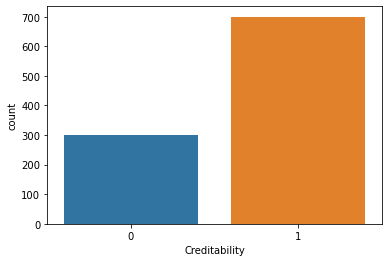

In [9]:
sns.countplot(x='Creditability',data=df)

In [10]:
df['Account Balance'].value_counts() # 1 - no running account
                                     # 2 - no balance or debit
                                     # 3 - 0 <= ... < 200 DM
                                     # 4 - ... >= 200 DM or checking account for at least 1 year 

4    394
1    274
2    269
3     63
Name: Account Balance, dtype: int64

<AxesSubplot:xlabel='Account Balance', ylabel='count'>

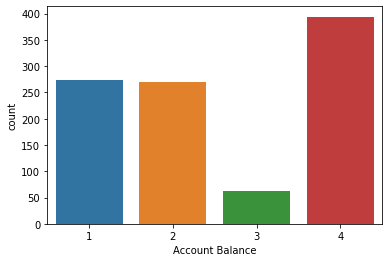

In [11]:
sns.countplot(x='Account Balance',data=df)

<AxesSubplot:xlabel='Account Balance', ylabel='count'>

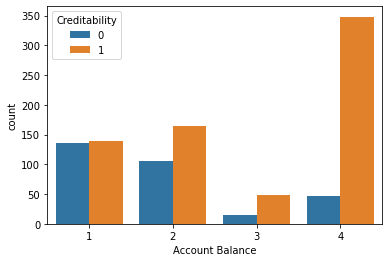

In [12]:
sns.countplot(x='Account Balance',hue='Creditability',data=df)

In [13]:
#df['Duration of Credit (month)'].value_counts()

<AxesSubplot:ylabel='Frequency'>

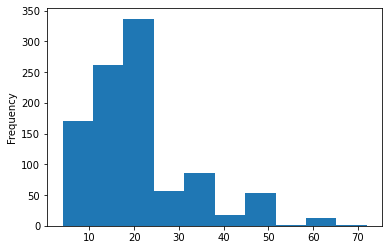

In [14]:
df['Duration of Credit (month)'].plot.hist()

In [15]:
df['Payment Status of Previous Credit'].value_counts() # 0 - hesitant payment of previous credits
                                                       # 1 - problematic running account / there are further credits running but at other bank
                                                       # 2 - no previous credits / paid back all previous credits 
                                                       # 3 - no problems with current credits at this bank 
                                                       # 4 - paid back previous credits at this bank

2    530
4    293
3     88
1     49
0     40
Name: Payment Status of Previous Credit, dtype: int64

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

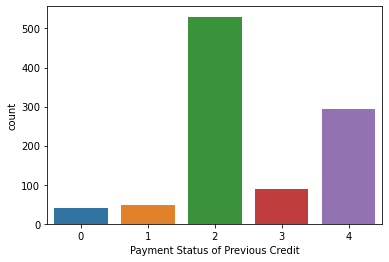

In [16]:
sns.countplot(x='Payment Status of Previous Credit',data=df)

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

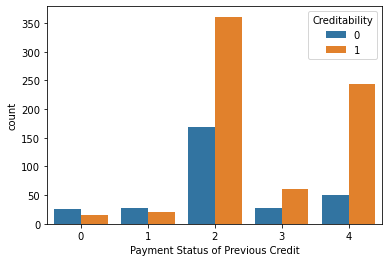

In [17]:
sns.countplot(x='Payment Status of Previous Credit',hue='Creditability',data=df)

In [18]:
df['Purpose'].value_counts() # 0 - Other
                             # 1 - New Car
                             # 2 - Used Car
                             # 3 - Items Of Furniture
                             # 4 - Radio Televison
                             # 5 - household appliances
                             # 6 - repair
                             # 7 - education
                             # 8 - Vacation
                             # 9 - retraining
                             # 10- business

3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: Purpose, dtype: int64

<AxesSubplot:xlabel='Purpose', ylabel='count'>

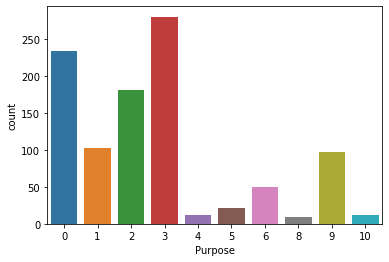

In [19]:
sns.countplot(x='Purpose',data=df)

<AxesSubplot:xlabel='Purpose', ylabel='count'>

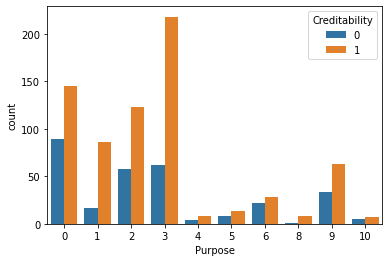

In [20]:
sns.countplot(x='Purpose',hue='Creditability',data=df)

In [21]:
df['Credit Amount'].value_counts()

1258     3
1275     3
1393     3
1262     3
1478     3
        ..
1346     1
10477    1
2924     1
1961     1
6350     1
Name: Credit Amount, Length: 923, dtype: int64

<AxesSubplot:ylabel='Frequency'>

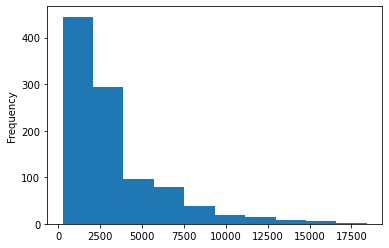

In [22]:
df['Credit Amount'].plot.hist()

In [23]:
df['Value Savings/Stocks'].value_counts() # 1 - not available / no savings
                                          # 2 - < 100,- DM
                                          # 3 - 100,- <= ... < 500,- DM 
                                          # 4 - 500,- <= ... < 1000,- DM
                                          # 5 - >= 1000,- DM

1    603
5    183
2    103
3     63
4     48
Name: Value Savings/Stocks, dtype: int64

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

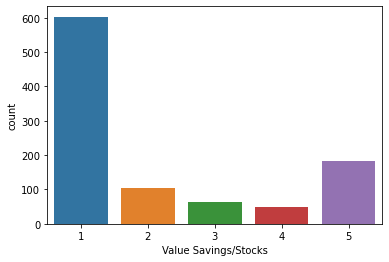

In [24]:
sns.countplot(x='Value Savings/Stocks',data=df)

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

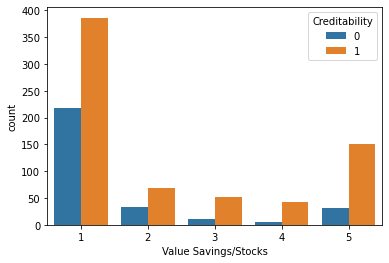

In [25]:
sns.countplot(x='Value Savings/Stocks',hue='Creditability',data=df)

In [26]:
df['Length of current employment'].value_counts() # 1- unemployed
                                                  # 2- <= 1 year
                                                  # 3- 1 <= ... < 4 years 
                                                  # 4- 4 <= ... < 7 years
                                                  # 5- >= 7 years 

3    339
5    253
4    174
2    172
1     62
Name: Length of current employment, dtype: int64

<AxesSubplot:xlabel='Length of current employment', ylabel='count'>

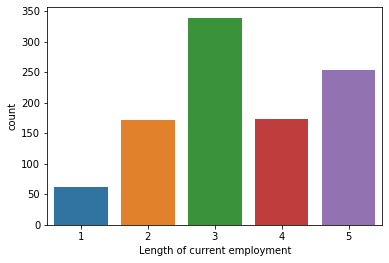

In [27]:
sns.countplot(x='Length of current employment',data=df)

<AxesSubplot:xlabel='Length of current employment', ylabel='count'>

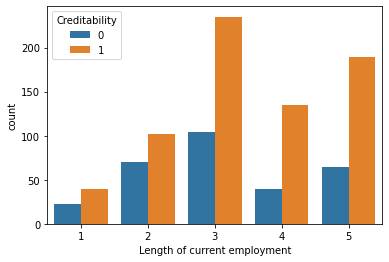

In [28]:
sns.countplot(x='Length of current employment',hue='Creditability',data=df)

In [29]:
df['Instalment per cent'].value_counts() # 1- >= 35
                                         # 2- 25 <= ... < 35
                                         # 3- 20 <= ... < 25
                                         # 4- < 20

4    476
2    231
3    157
1    136
Name: Instalment per cent, dtype: int64

<AxesSubplot:xlabel='Instalment per cent', ylabel='count'>

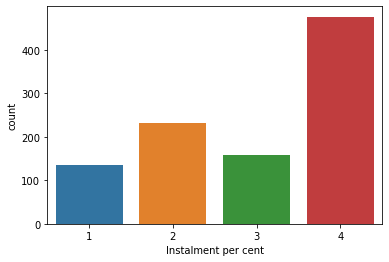

In [30]:
sns.countplot(x='Instalment per cent',data=df)

In [31]:
df['Sex & Marital Status'].value_counts() # 1- male: divorced / living apart
                                          # 2- male: single
                                          # 3- male: married / widowed
                                          # 4- female

3    548
2    310
4     92
1     50
Name: Sex & Marital Status, dtype: int64

<AxesSubplot:xlabel='Sex & Marital Status', ylabel='count'>

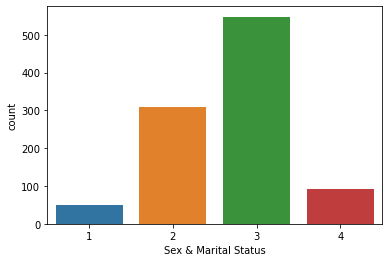

In [32]:
sns.countplot(x='Sex & Marital Status',data=df)

<AxesSubplot:xlabel='Sex & Marital Status', ylabel='count'>

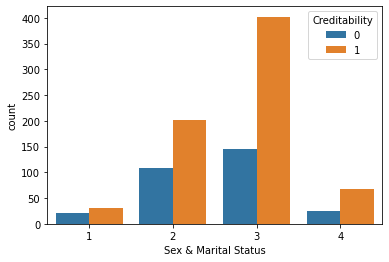

In [33]:
sns.countplot(x='Sex & Marital Status',hue='Creditability',data=df)

In [34]:
df['Guarantors'].value_counts() # 1- None
                                # 2- Co-Applicant
                                # 3- Gurantor

1    907
3     52
2     41
Name: Guarantors, dtype: int64

<AxesSubplot:xlabel='Guarantors', ylabel='count'>

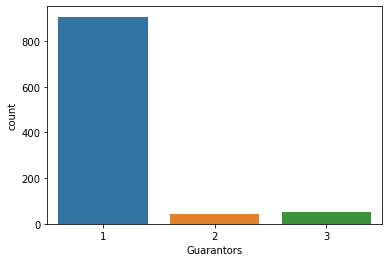

In [35]:
sns.countplot(x='Guarantors',data=df)

<AxesSubplot:xlabel='Guarantors', ylabel='count'>

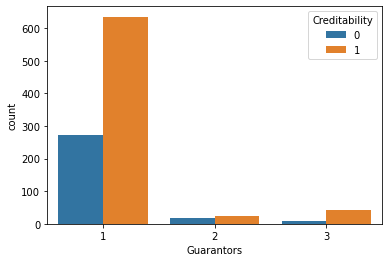

In [36]:
sns.countplot(x='Guarantors',hue='Creditability',data=df)

In [37]:
df['Duration in Current address'].value_counts() # 1 - < 1 year
                                                 # 2 - 1 <= ... < 4 years
                                                 # 3 - 4 <= ... < 7 years
                                                 # 4 - >= 7 years

4    413
2    308
3    149
1    130
Name: Duration in Current address, dtype: int64

<AxesSubplot:xlabel='Duration in Current address', ylabel='count'>

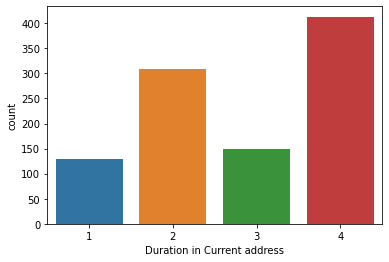

In [38]:
sns.countplot(x='Duration in Current address',data=df)

<AxesSubplot:xlabel='Duration in Current address', ylabel='count'>

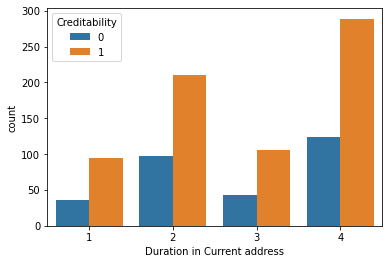

In [39]:
sns.countplot(x='Duration in Current address',hue='Creditability',data=df)

In [40]:
df['Most valuable available asset'].value_counts() # 1 - not available / no assets
                                                   # 2 - Car / Other
                                                   # 3 - Savings contract with a building society / Life insurance
                                                   # 4 - Ownership of house or land

3    332
1    282
2    232
4    154
Name: Most valuable available asset, dtype: int64

<AxesSubplot:xlabel='Most valuable available asset', ylabel='count'>

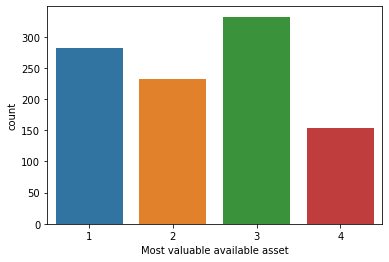

In [41]:
sns.countplot(x='Most valuable available asset',data=df)

<AxesSubplot:xlabel='Most valuable available asset', ylabel='count'>

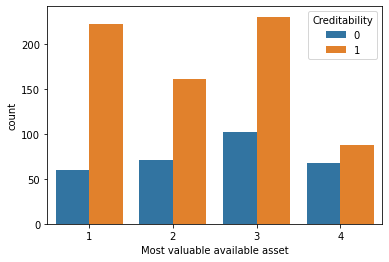

In [42]:
sns.countplot(x='Most valuable available asset',hue='Creditability',data=df)

<AxesSubplot:ylabel='Frequency'>

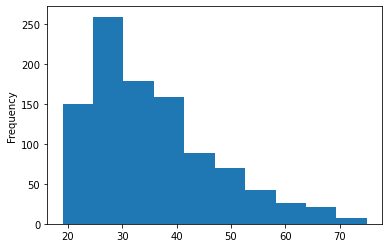

In [43]:
df['Age (years)'].plot.hist()

In [44]:
df['Concurrent Credits'].value_counts() # 1 - at other banks
                                        # 2 - at department store or mail order house  
                                        # 3 - no further running credits

3    814
1    139
2     47
Name: Concurrent Credits, dtype: int64

<AxesSubplot:xlabel='Concurrent Credits', ylabel='count'>

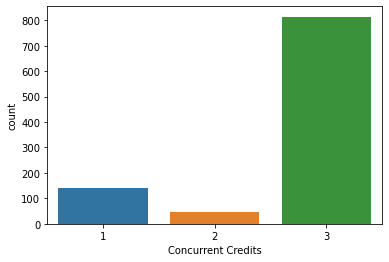

In [45]:
sns.countplot(x='Concurrent Credits',data=df)

<AxesSubplot:xlabel='Concurrent Credits', ylabel='count'>

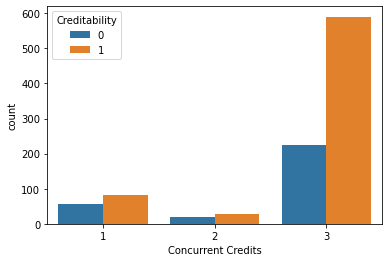

In [46]:
sns.countplot(x='Concurrent Credits',hue='Creditability',data=df)

In [47]:
df['Type of apartment'].value_counts()   # 1 - free apartment
                                         # 2 - rented flat
                                         # 3 - owner-occupied flat

2    714
1    179
3    107
Name: Type of apartment, dtype: int64

<AxesSubplot:xlabel='Type of apartment', ylabel='count'>

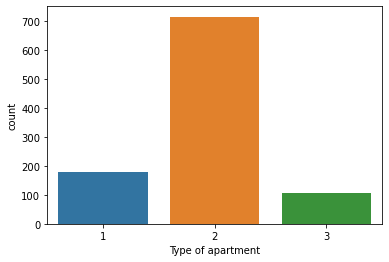

In [48]:
sns.countplot(x='Type of apartment',data=df)

<AxesSubplot:xlabel='Type of apartment', ylabel='count'>

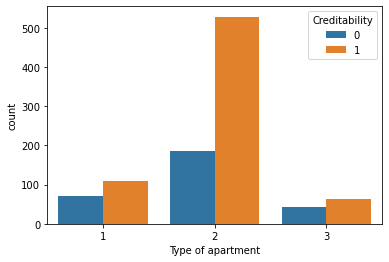

In [49]:
sns.countplot(x='Type of apartment',hue='Creditability',data=df)

In [50]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [51]:
df['No of Credits at this Bank'].value_counts() # 1 - One
                                                # 2 - Two or Three
                                                # 3 - Four or Five
                                                # 4 - Six or more
             

1    633
2    333
3     28
4      6
Name: No of Credits at this Bank, dtype: int64

<AxesSubplot:xlabel='No of Credits at this Bank', ylabel='count'>

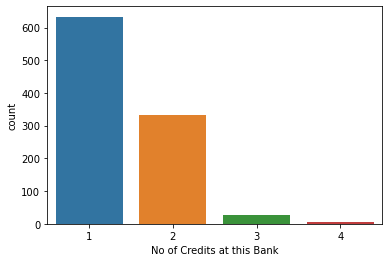

In [52]:
sns.countplot(x='No of Credits at this Bank',data=df)

<AxesSubplot:xlabel='No of Credits at this Bank', ylabel='count'>

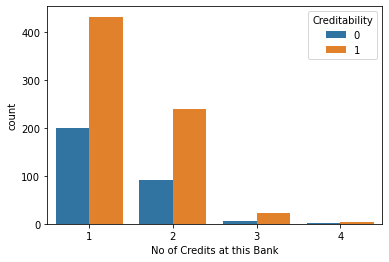

In [53]:
sns.countplot(x='No of Credits at this Bank',hue='Creditability',data=df)

In [54]:
df['Occupation'].value_counts() # 1 - unemployed / unskilled with no permanent residence
                                # 2 - unskilled with permanent residence
                                # 3 - skilled worker / skilled employee / minor civil servant
                                # 4 - executive / self-employed / higher civil servant

3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

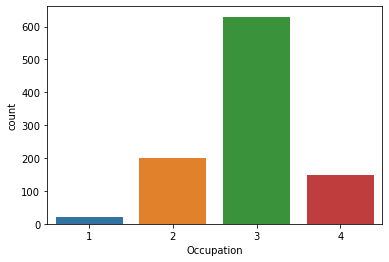

In [55]:
sns.countplot(x='Occupation',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

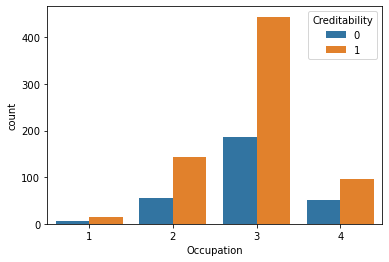

In [56]:
sns.countplot(x='Occupation',hue='Creditability',data=df)

In [57]:
df['No of dependents'].value_counts() # 1 - 3 and more 
                                      # 2 - 0 to 2 

1    845
2    155
Name: No of dependents, dtype: int64

<AxesSubplot:xlabel='No of dependents', ylabel='count'>

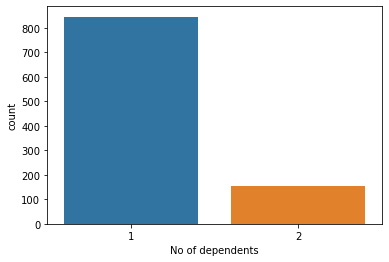

In [58]:
sns.countplot(x='No of dependents',data=df)

<AxesSubplot:xlabel='No of dependents', ylabel='count'>

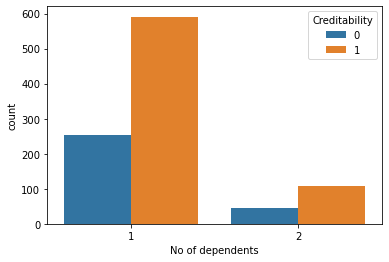

In [59]:
sns.countplot(x='No of dependents',hue='Creditability',data=df)

In [60]:
df['Telephone'].value_counts() # 1 - no
                               # 2 - yes

1    596
2    404
Name: Telephone, dtype: int64

<AxesSubplot:xlabel='Telephone', ylabel='count'>

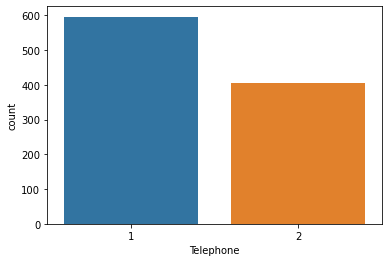

In [61]:
sns.countplot(x='Telephone',data=df)

<AxesSubplot:xlabel='Telephone', ylabel='count'>

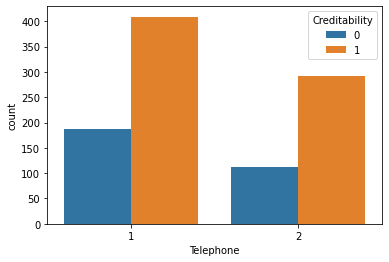

In [62]:
sns.countplot(x='Telephone',hue='Creditability',data=df)

In [63]:
df['Foreign Worker'].value_counts() # 1 - yes
                                    # 2 - No

1    963
2     37
Name: Foreign Worker, dtype: int64

<AxesSubplot:xlabel='Foreign Worker', ylabel='count'>

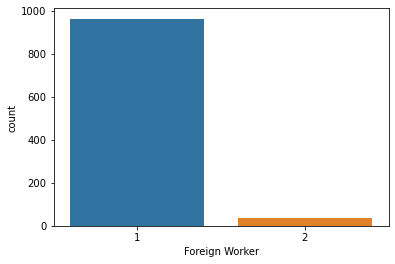

In [64]:
sns.countplot(x='Foreign Worker',data=df)

<AxesSubplot:xlabel='Foreign Worker', ylabel='count'>

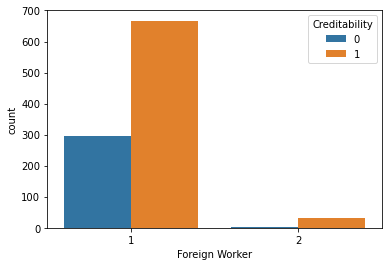

In [65]:
sns.countplot(x='Foreign Worker',hue='Creditability',data=df)

###### We can also plot the graph via loop but readability will decrease.

In [66]:
df2=df.drop(['Duration of Credit (month)','Credit Amount','Age (years)'],axis=1)

In [67]:
def count_plot():
    for i in df2.columns:
      print(i,plt.show((sns.countplot(x=i,data=df2))))

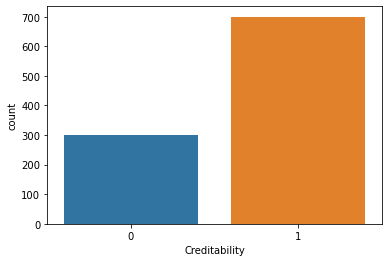

Creditability None


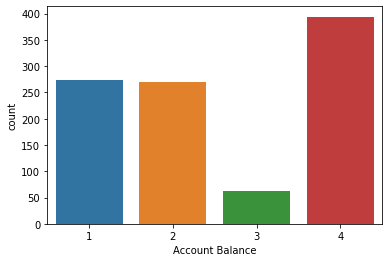

Account Balance None


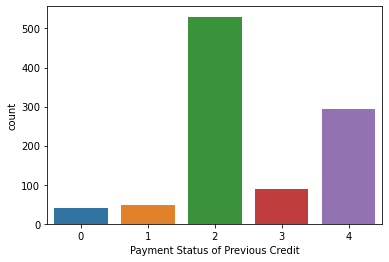

Payment Status of Previous Credit None


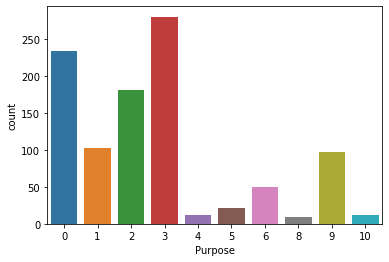

Purpose None


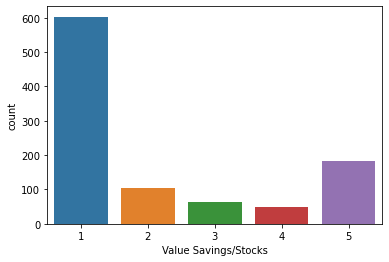

Value Savings/Stocks None


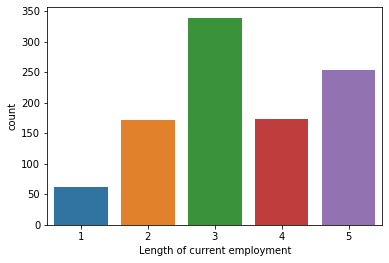

Length of current employment None


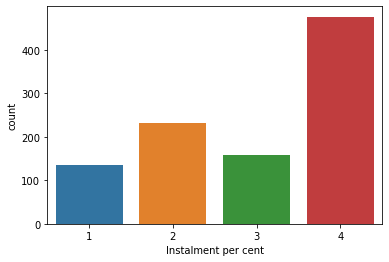

Instalment per cent None


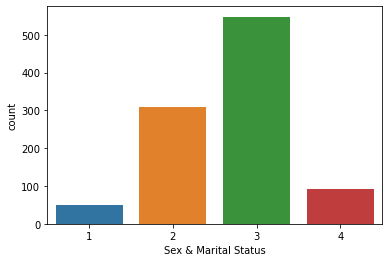

Sex & Marital Status None


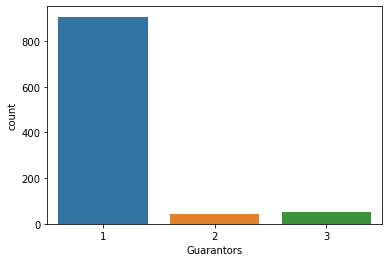

Guarantors None


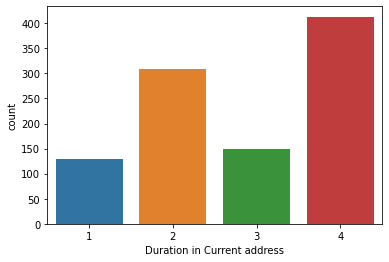

Duration in Current address None


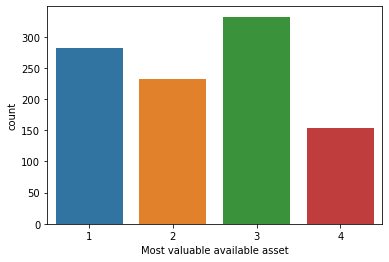

Most valuable available asset None


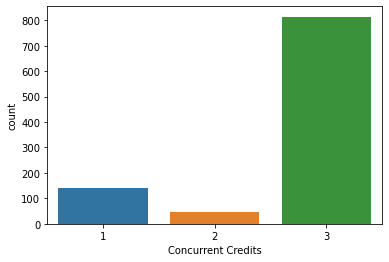

Concurrent Credits None


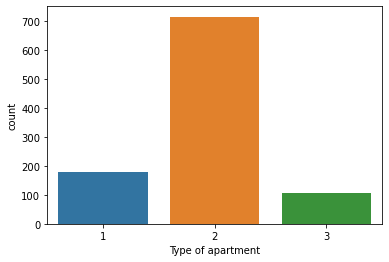

Type of apartment None


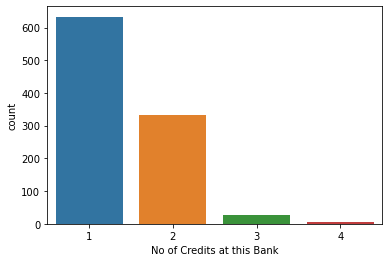

No of Credits at this Bank None


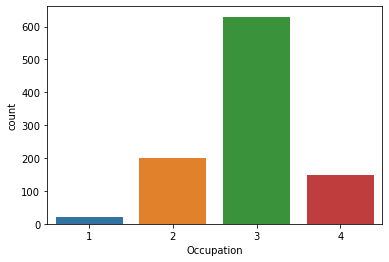

Occupation None


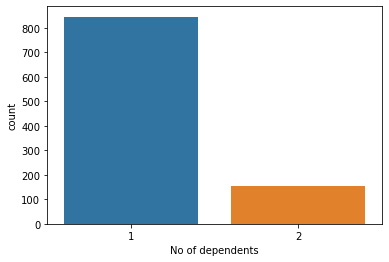

No of dependents None


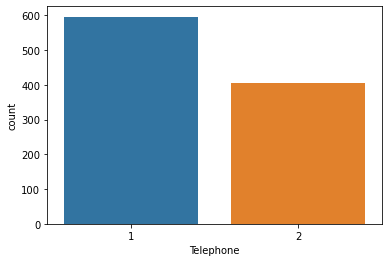

Telephone None


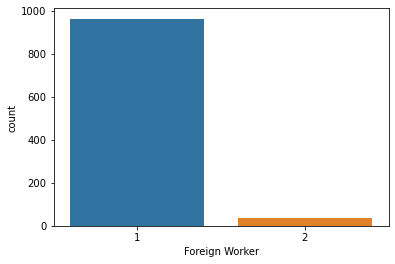

Foreign Worker None


In [68]:
count_plot()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [70]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


###### Data Preprocessing

In [71]:
scalar = MinMaxScaler(feature_range=(0, 1))

In [72]:
df['Credit Amount']=df['Credit Amount'].array.reshape(-1,1)

In [73]:
df[['Credit Amount']]=scalar.fit_transform(df[['Credit Amount']])

In [74]:
df['Credit Amount']

0      0.043964
1      0.140255
2      0.032519
3      0.103004
4      0.105700
         ...   
995    0.095576
996    0.112964
997    0.683944
998    0.342137
999    0.335644
Name: Credit Amount, Length: 1000, dtype: float64

In [75]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,0.043964,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,0.140255,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,0.032519,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,0.103004,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,0.105700,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [76]:
X=df.drop(['Creditability'],axis=1)
Y=df['Creditability']

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=52)

In [78]:
model_params={
   'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[1,2,3,4,5,6,7]
        }
   },
    "svm":{
        'model':SVC(),
        'params':{
            'C':[10,20,30],
            'kernel':['rbf','linear']
        }
    },
    'random forest':{
        'model':RandomForestClassifier(),
        'params':{
            "n_estimators":[50,60,70,90,100,110,120,200],
             "criterion":['gini','entropy'],
              'max_depth':[2,3,4,5,6,7,8,9,10]
    
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,4,5,6,7,8]
        }
    }
    
        }
   

In [79]:
for model_name, mp in model_params.items():
    print(mp)

{'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7]}}
{'model': SVC(), 'params': {'C': [10, 20, 30], 'kernel': ['rbf', 'linear']}}
{'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 60, 70, 90, 100, 110, 120, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}}
{'model': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 4, 5, 6, 7, 8]}}


In [84]:
scores = []
for model_name, mp in model_params.items():
    clf1 = GridSearchCV(mp['model'], mp['params'], cv=5,return_train_score=False)
    clf1.fit(X_train,Y_train)
    scores.append({
        'model' : model_name,
        'best_score': clf1.best_score_,
        'best_params': clf1.best_params_
    })

In [85]:
best_parameter=pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [86]:
best_parameter

,model,best_score,best_params
0,Decision Tree,0.70000,"{'criterion': 'gini', 'max_depth': 4}"
1,svm,0.75000,"{'C': 20, 'kernel': 'rbf'}"
2,random forest,0.75750,"{'criterion': 'gini', 'max_depth': 9, 'n_estim..."
3,knn,0.70625,{'n_neighbors': 7}


##### Here we see that our accuracy of model of unbalanced data

#### Feature selection of unbalanced data

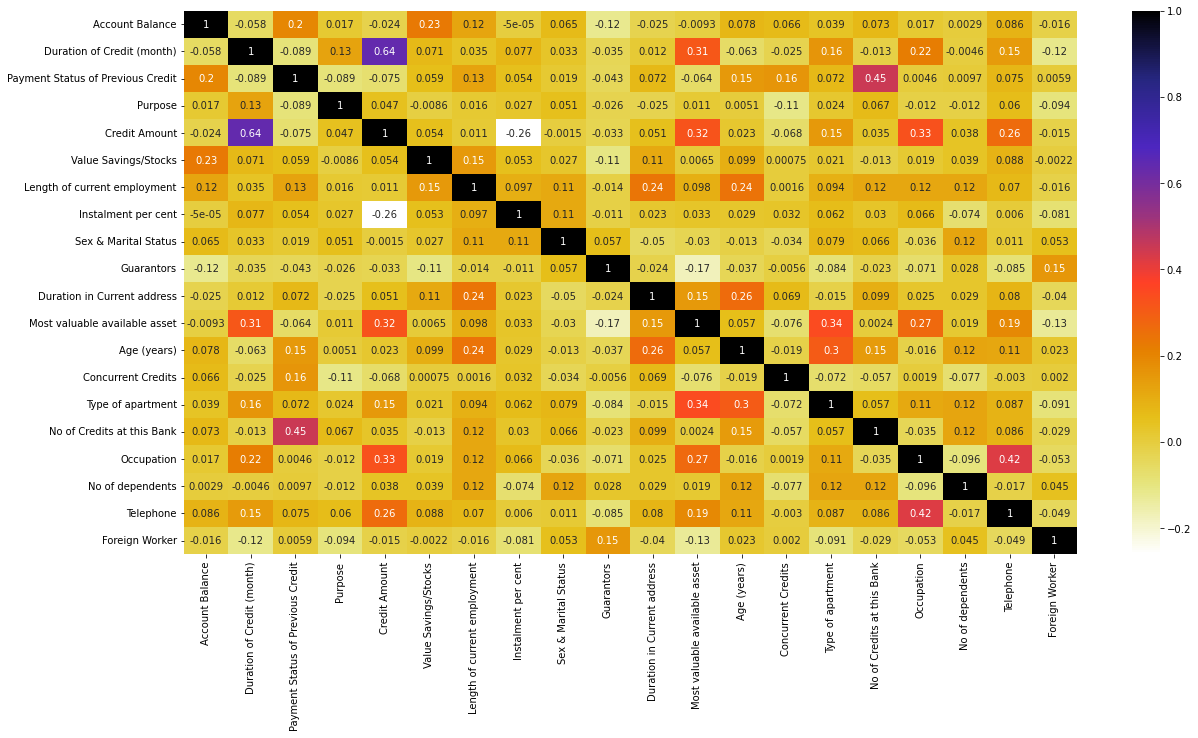

In [87]:
plt.figure(figsize=(20,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [88]:
# with the following function we can select highly correlated feature
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set() # sel of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [89]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

In [90]:
# here is no highly correlated feature 

In [91]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
A = X_train
vif['Features'] = A.columns
vif['VIF'] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Occupation,25.94
19,Foreign Worker,25.68
14,Type of apartment,18.38
8,Sex & Marital Status,15.80
13,Concurrent Credits,14.33
12,Age (years),14.23
18,Telephone,12.00
17,No of dependents,11.29
6,Length of current employment,10.80
7,Instalment per cent,10.21


##### we remove those featurs whose VIF is greater than 10.

In [92]:
X_train_new=X_train.drop(['Occupation','Foreign Worker','Type of apartment','Sex & Marital Status','Concurrent Credits','Age (years)','Telephone','No of dependents'],axis=1)

In [93]:
scores1 = []
for model_name, mp in model_params.items():
    clf2 = GridSearchCV(mp['model'], mp['params'], cv=5,return_train_score=False)
    clf2.fit(X_train_new,Y_train)
    scores1.append({
        'model' : model_name,
        'best_score': clf2.best_score_,
        'best_params': clf2.best_params_
    })

In [94]:
best_parameter1 =pd.DataFrame(scores1, columns=['model','best_score','best_params'])

In [95]:
best_parameter1

,model,best_score,best_params
0,Decision Tree,0.70500,"{'criterion': 'entropy', 'max_depth': 6}"
1,svm,0.74000,"{'C': 10, 'kernel': 'rbf'}"
2,random forest,0.76625,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
3,knn,0.72625,{'n_neighbors': 5}


### SMOTE Technique (purpose = Balancing the dataset)

In [96]:
df=SMOTE('minority')
x,y=df.fit_resample(X,Y)
x=DataFrame(x,columns=X.columns)
y=DataFrame(y,columns=['Creditability'])

In [97]:
print(x.shape)
print(y.shape)

(1400, 20)
(1400, 1)


###### Accuracy and best parametre finding on balanced dataset without usinh feature selection technique

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)

In [99]:
scores2 = []
for model_name, mp in model_params.items():
    clf3 = GridSearchCV(mp['model'], mp['params'], cv=5,return_train_score=False)
    clf3.fit(x_train,y_train)
    scores2.append({
        'model' : model_name,
        'best_score': clf3.best_score_,
        'best_params': clf3.best_params_
    })

In [100]:
scores2

[{'model': 'Decision Tree',
  'best_score': 0.7776785714285714,
  'best_params': {'criterion': 'gini', 'max_depth': 5}},
 {'model': 'svm',
  'best_score': 0.7901785714285714,
  'best_params': {'C': 10, 'kernel': 'linear'}},
 {'model': 'random forest',
  'best_score': 0.8276785714285714,
  'best_params': {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}},
 {'model': 'knn',
  'best_score': 0.7705357142857142,
  'best_params': {'n_neighbors': 3}}]

In [101]:
best_parameter3 =pd.DataFrame(scores2, columns=['model','best_score','best_params'])
best_parameter3

,model,best_score,best_params
0,Decision Tree,0.777679,"{'criterion': 'gini', 'max_depth': 5}"
1,svm,0.790179,"{'C': 10, 'kernel': 'linear'}"
2,random forest,0.827679,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
3,knn,0.770536,{'n_neighbors': 3}


In [102]:
for z in best_parameter3.values:
  print(z)

['Decision Tree' 0.7776785714285714 {'criterion': 'gini', 'max_depth': 5}]
['svm' 0.7901785714285714 {'C': 10, 'kernel': 'linear'}]
['random forest' 0.8276785714285714
 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}]
['knn' 0.7705357142857142 {'n_neighbors': 3}]


##### Here we are using feature selection method and then check accuracy and fetch best algorithm for our model

##### VIP Method

In [103]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
B = x_train
vif['Features'] = B.columns
vif['VIF'] = [variance_inflation_factor(B.values, i) for i in range(B.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Foreign Worker,29.94
16,Occupation,24.34
14,Type of apartment,17.43
8,Sex & Marital Status,16.17
12,Age (years),14.47
13,Concurrent Credits,12.98
17,No of dependents,12.87
18,Telephone,11.85
7,Instalment per cent,10.71
6,Length of current employment,10.31


In [104]:
x_train_new=x_train.drop(['Occupation','Foreign Worker','Type of apartment','Sex & Marital Status','Concurrent Credits','Age (years)','Telephone','No of dependents','Instalment per cent','Length of current employment'],axis=1)

In [105]:
scores3 = []
for model_name, mp in model_params.items():
    clf3 = GridSearchCV(mp['model'], mp['params'], cv=5,return_train_score=False)
    clf3.fit(x_train_new,y_train)
    scores3.append({
        'model' : model_name,
        'best_score': clf3.best_score_,
        'best_params': clf3.best_params_
    })

In [106]:
best_parameter4 =pd.DataFrame(scores3, columns=['model','best_score','best_params'])
best_parameter4

,model,best_score,best_params
0,Decision Tree,0.767857,"{'criterion': 'gini', 'max_depth': 5}"
1,svm,0.768750,"{'C': 10, 'kernel': 'rbf'}"
2,random forest,0.803571,"{'criterion': 'gini', 'max_depth': 8, 'n_estim..."
3,knn,0.758036,{'n_neighbors': 3}


In [107]:
for z in best_parameter4.values:
  print(z)

['Decision Tree' 0.7678571428571429 {'criterion': 'gini', 'max_depth': 5}]
['svm' 0.7687499999999999 {'C': 10, 'kernel': 'rbf'}]
['random forest' 0.8035714285714286
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 110}]
['knn' 0.7580357142857144 {'n_neighbors': 3}]


##### 1. Here we are seeing that after using featrure selecting method (VIP Method) our accuracy of model is decresing so we are not not using feature selecting on balanced dataset.

##### 2. And also all of our model balanced dataset without using feature selecting technique is giving best accuracy.

##### 3. in this random forest is giving best accuracy approx. 83% accuracy so we are selecting this algorithm to predicting our model.

### RANDOM FOREST

In [108]:
random_forest=RandomForestClassifier(criterion='entropy', max_depth= 10, n_estimators= 120,random_state=98)

In [109]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=120,
                       random_state=98)

In [110]:
y_pred_random_forest_test=random_forest.predict(x_test) # Checking accuracy on test data

In [111]:
print("Confusion Matrix: \n",metrics.classification_report(y_test,y_pred_random_forest_test))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_random_forest_test))
print("Precision:",metrics.precision_score(y_test,y_pred_random_forest_test))
print("recall_sensitivity:",metrics.recall_score(y_test,y_pred_random_forest_test))
print("recall_specificity:",metrics.recall_score(y_test,y_pred_random_forest_test))
print("f1_positive:", metrics.f1_score(y_test,y_pred_random_forest_test))
print("f1_negative:", metrics.f1_score(y_test,y_pred_random_forest_test))
print("Hamming Loss:", metrics.hamming_loss(y_test,y_pred_random_forest_test))

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       135
           1       0.87      0.79      0.83       145

    accuracy                           0.83       280
   macro avg       0.83      0.83      0.83       280
weighted avg       0.83      0.83      0.83       280

Accuracy: 0.8285714285714286
Precision: 0.8702290076335878
recall_sensitivity: 0.7862068965517242
recall_specificity: 0.7862068965517242
f1_positive: 0.8260869565217391
f1_negative: 0.8260869565217391
Hamming Loss: 0.17142857142857143


In [112]:
y_pred_random_forest_train=random_forest.predict(x_train) # check accuracy on train data

In [113]:
print("Confusion Matrix: \n",metrics.classification_report(y_train,y_pred_random_forest_train))
print("Accuracy:",metrics.accuracy_score(y_train,y_pred_random_forest_train))
print("Precision:",metrics.precision_score(y_train,y_pred_random_forest_train))
print("recall_sensitivity:",metrics.recall_score(y_train,y_pred_random_forest_train))
print("recall_specificity:",metrics.recall_score(y_train,y_pred_random_forest_train))
print("f1_positive:", metrics.f1_score(y_train,y_pred_random_forest_train))
print("f1_negative:", metrics.f1_score(y_train,y_pred_random_forest_train))
print("Hamming Loss:", metrics.hamming_loss(y_train,y_pred_random_forest_train))

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       565
           1       1.00      0.94      0.97       555

    accuracy                           0.97      1120
   macro avg       0.97      0.97      0.97      1120
weighted avg       0.97      0.97      0.97      1120

Accuracy: 0.9714285714285714
Precision: 0.9980952380952381
recall_sensitivity: 0.9441441441441442
recall_specificity: 0.9441441441441442
f1_positive: 0.9703703703703704
f1_negative: 0.9703703703703704
Hamming Loss: 0.02857142857142857


In [114]:
len(x_train.columns)

20

In [115]:
feature_importance=pd.DataFrame({
    'random_forest':random_forest.feature_importances_ },index=x_train.columns)
     


In [116]:
feature_importance

,random_forest
Account Balance,0.167731
Duration of Credit (month),0.086983
Payment Status of Previous Credit,0.087975
Purpose,0.056646
Credit Amount,0.094219
Value Savings/Stocks,0.064983
Length of current employment,0.052409
Instalment per cent,0.030719
Sex & Marital Status,0.039175
Guarantors,0.021932


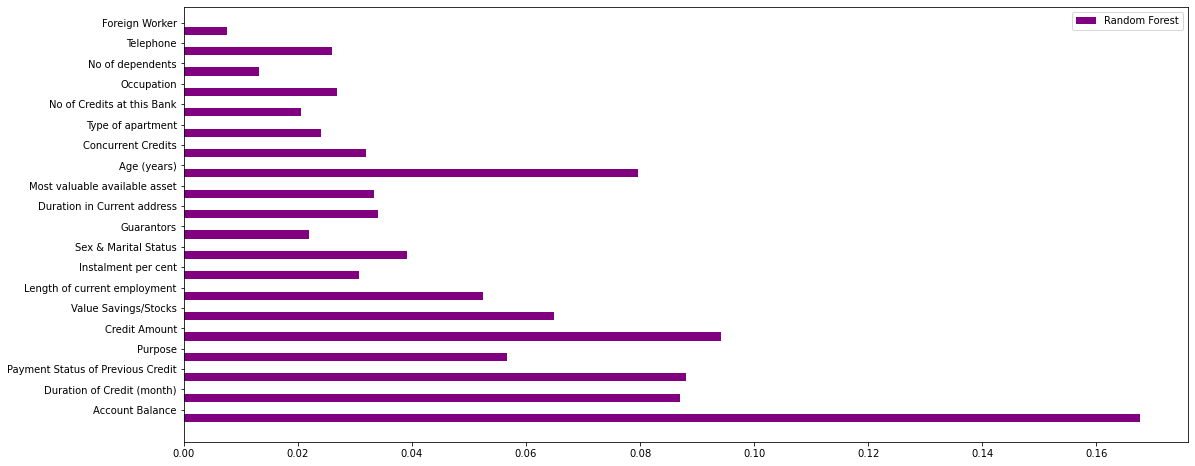

In [117]:

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
model_feature=ax.barh(index,feature_importance['random_forest'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [118]:
x_test

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
454,1,14,2,0,0.204853,1,1,1,3,1,4,4,22,3,3,1,3,1,1,1
715,4,36,0,5,0.130021,1,3,4,3,1,2,3,27,3,2,2,3,1,1,1
144,4,36,2,3,0.117971,5,3,4,2,1,4,3,25,3,2,1,3,1,1,1
585,1,24,2,1,0.146363,1,4,2,3,1,1,4,34,3,3,1,4,1,2,1
287,4,9,2,3,0.134643,1,3,1,3,1,2,1,32,3,2,1,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,4,24,4,2,0.097832,1,4,2,3,1,2,2,30,3,2,2,2,1,1,1
547,3,10,4,3,0.060361,5,4,4,3,1,2,2,27,3,2,2,3,1,2,1
632,1,24,2,2,0.215638,1,3,4,3,1,4,2,28,3,2,1,3,1,1,1
248,2,15,2,5,0.131011,2,3,3,2,1,2,1,25,3,2,1,2,1,1,1


In [119]:
import pickle
pickle.dump(random_forest, open('model2.pkl','wb'))

random_forest = pickle.load(open('model2.pkl','rb'))
